In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [7]:
dataDir = './data'
dataType = 'train2014'

## インスタンスアノテーション

In [8]:
# インスタンスアノテーションデータで初期化
annFile = '%s/annotations/instances_%s.json' % (dataDir, dataType)
coco = COCO(annFile)

loading annotations into memory...
Done (t=12.34s)
creating index...
index created!


In [13]:
categories = coco.loadCats(coco.getCatIds())

In [14]:
categories

[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},

In [23]:
names = [cat['name'] for cat in categories]

In [24]:
# COCOのカテゴリリスト
print('COCO categories: \n', ' '.join(names))

COCO categories: 
 person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush


In [25]:
names = set([cat['supercategory'] for cat in categories])

In [27]:
# COCOのスーパーカテゴリリスト
print('COCO supercategories: \n', ' '.join(names))

COCO supercategories: 
 food appliance kitchen electronic vehicle furniture accessory sports indoor animal outdoor person


In [111]:
# 特定のカテゴリに属する画像をランダムに取得する
catIds = coco.getCatIds(catNms=['person', 'dog', 'skateboard'])

In [112]:
imgIds = coco.getImgIds(catIds=catIds)

In [113]:
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

In [114]:
img

{'coco_url': 'http://mscoco.org/images/568187',
 'date_captured': '2013-11-18 10:52:54',
 'file_name': 'COCO_train2014_000000568187.jpg',
 'flickr_url': 'http://farm5.staticflickr.com/4027/4377663947_4632f4f029_z.jpg',
 'height': 375,
 'id': 568187,
 'license': 5,
 'width': 500}

In [115]:
I = io.imread('data/train2014/' + img['file_name'])

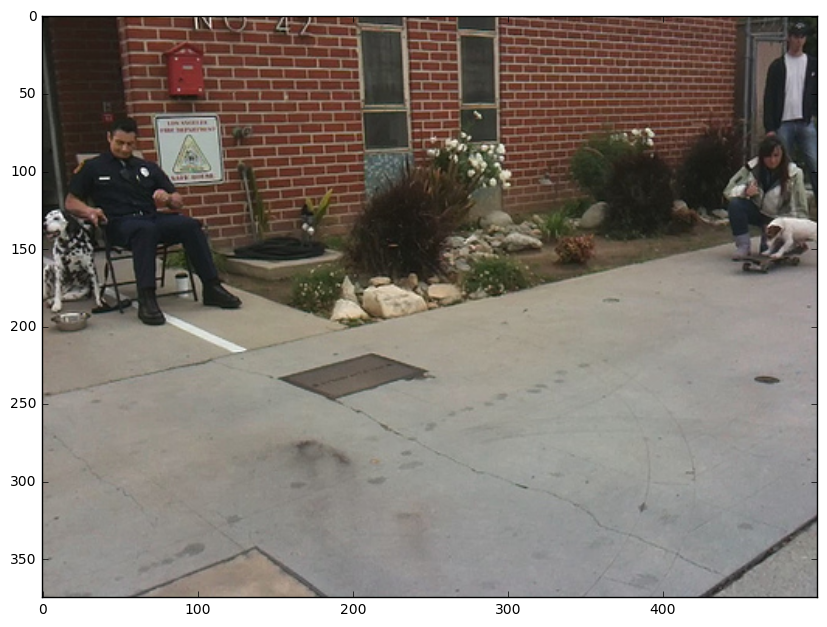

In [116]:
plt.imshow(I)

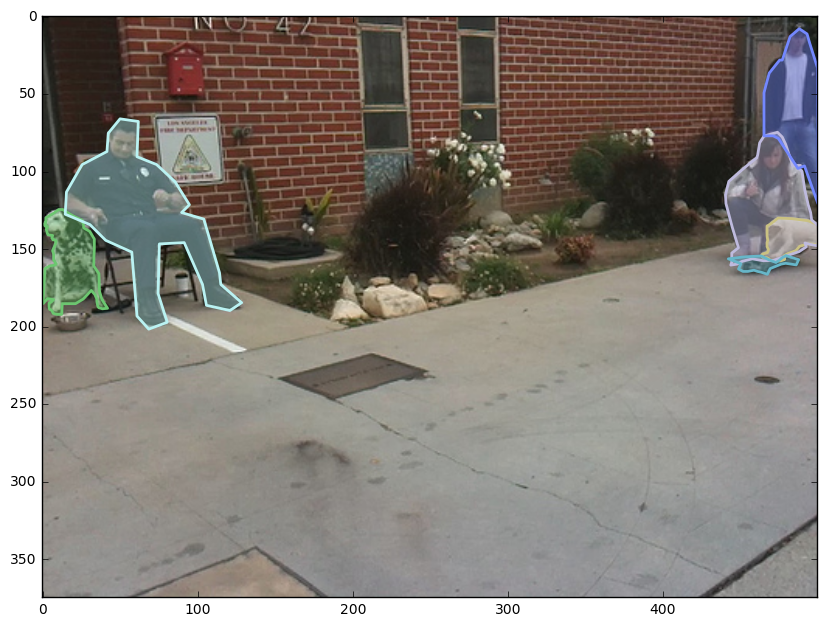

In [117]:
plt.imshow(I)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [118]:
anns

[{'area': 1712.2799,
  'bbox': [0.0, 124.22, 41.69, 67.66],
  'category_id': 18,
  'id': 3206,
  'image_id': 568187,
  'iscrowd': 0,
  'segmentation': [[1.62,
    133.75,
    1.95,
    129.48,
    6.55,
    126.85,
    10.16,
    124.22,
    12.79,
    124.22,
    17.39,
    127.18,
    21.0,
    129.15,
    25.27,
    131.12,
    26.25,
    134.4,
    26.25,
    136.05,
    30.19,
    138.34,
    33.15,
    143.27,
    33.15,
    149.51,
    32.82,
    157.07,
    32.82,
    160.68,
    36.11,
    165.6,
    36.43,
    176.77,
    38.08,
    182.35,
    41.69,
    187.94,
    38.4,
    188.27,
    36.11,
    187.61,
    35.45,
    186.95,
    34.79,
    183.67,
    34.79,
    182.03,
    33.48,
    179.07,
    31.18,
    176.44,
    25.92,
    182.03,
    21.0,
    184.98,
    12.46,
    184.98,
    12.13,
    191.88,
    8.85,
    191.88,
    6.55,
    191.22,
    6.22,
    190.56,
    6.22,
    190.24,
    5.56,
    189.25,
    4.25,
    188.59,
    3.92,
    187.28,
    3.92,
    1

## キーポイントアノテーション

In [119]:
annFile = '%s/annotations/person_keypoints_%s.json' % (dataDir, dataType)
coco_kps = COCO(annFile)

loading annotations into memory...
Done (t=7.03s)
creating index...
index created!


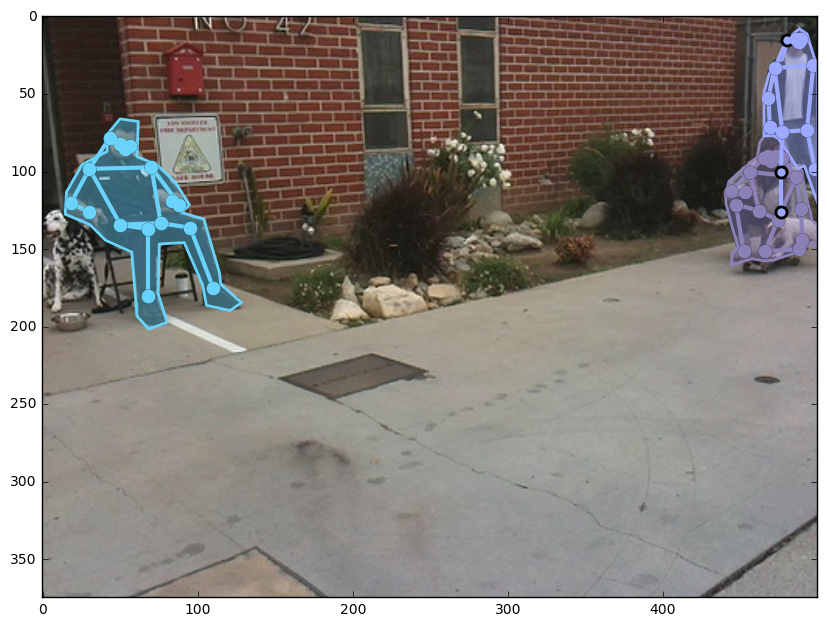

In [120]:
plt.imshow(I)
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [122]:
anns[0]['num_keypoints']

16

In [125]:
# (x1, y1, v1)
anns[0]['keypoints']

[53,
 85,
 2,
 56,
 83,
 2,
 50,
 82,
 2,
 0,
 0,
 0,
 43,
 78,
 2,
 70,
 97,
 2,
 30,
 98,
 2,
 88,
 121,
 2,
 18,
 120,
 2,
 83,
 119,
 2,
 30,
 126,
 2,
 76,
 133,
 2,
 50,
 134,
 2,
 95,
 136,
 2,
 68,
 137,
 2,
 110,
 175,
 2,
 68,
 180,
 2]

In [124]:
anns

[{'area': 5789.7459,
  'bbox': [14.33, 65.73, 113.88, 135.67],
  'category_id': 1,
  'id': 212191,
  'image_id': 568187,
  'iscrowd': 0,
  'keypoints': [53,
   85,
   2,
   56,
   83,
   2,
   50,
   82,
   2,
   0,
   0,
   0,
   43,
   78,
   2,
   70,
   97,
   2,
   30,
   98,
   2,
   88,
   121,
   2,
   18,
   120,
   2,
   83,
   119,
   2,
   30,
   126,
   2,
   76,
   133,
   2,
   50,
   134,
   2,
   95,
   136,
   2,
   68,
   137,
   2,
   110,
   175,
   2,
   68,
   180,
   2],
  'num_keypoints': 16,
  'segmentation': [[68.26,
    201.4,
    60.67,
    192.98,
    57.3,
    151.69,
    40.45,
    144.1,
    30.34,
    133.99,
    14.33,
    127.25,
    15.17,
    112.92,
    25.28,
    95.22,
    41.29,
    86.8,
    41.29,
    86.8,
    42.13,
    75,
    49.72,
    65.73,
    61.52,
    67.42,
    60.67,
    90.17,
    73.31,
    95.22,
    85.11,
    106.18,
    94.51,
    121.14,
    89.45,
    126.19,
    103.78,
    130.41,
    113.89,
    164.96,
    114.73,
   

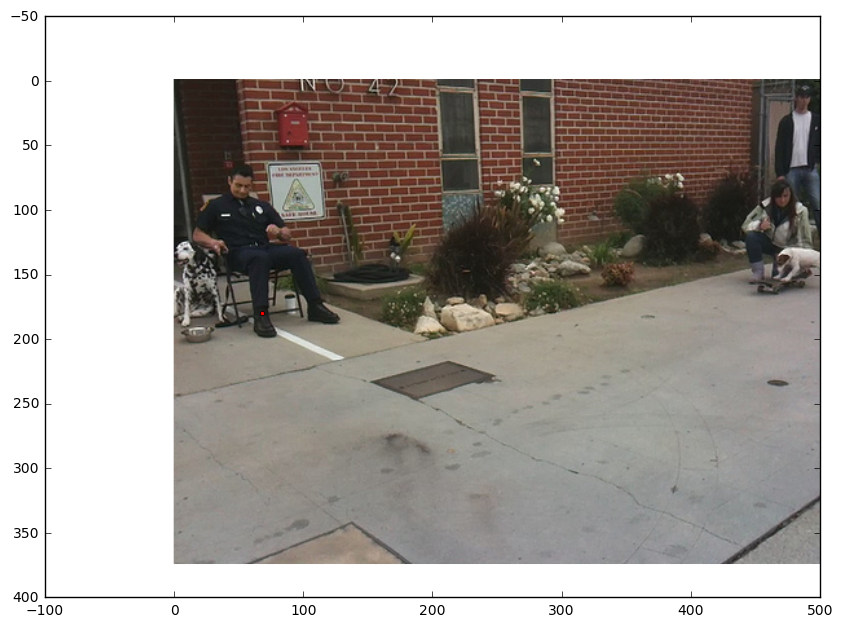

In [141]:
plt.imshow(I)
plt.plot([68], [180], marker='o', markersize=3, color='red')